In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv("Fraud_check.csv")
data 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
label_encoder=preprocessing.LabelEncoder()

In [4]:
data['Undergrad']=label_encoder.fit_transform(data['Undergrad']) 
data['Urban']=label_encoder.fit_transform(data['Urban'])
data['Marital.Status']=label_encoder.fit_transform(data['Marital.Status'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [5]:
np.min(data['Taxable.Income'])

10003

In [6]:
np.max(data['Taxable.Income'])

99619

In [7]:
taxable_new=pd.cut(data['Taxable.Income'],bins=[10003,30000,99619],labels=['Risky','Good'])
taxable_new

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [8]:
x=pd.Series(taxable_new)
x

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [9]:
data['Taxable_Categorical']=x
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_Categorical
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [10]:
data1=data.drop(['Taxable.Income'],axis=1)
data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Categorical
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [11]:
data1['Taxable_Categorical']=np.where(data['Taxable_Categorical'].str.contains('Good'),0,1) 
data1 

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_Categorical
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [12]:
x=data1.iloc[:,0:5]
y=data1['Taxable_Categorical']

In [13]:
x 

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [14]:
y 

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable_Categorical, Length: 600, dtype: int32

In [15]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42) 

# Decision Tree Model

# Building Decision Tree Classifier using Entropy Criteria 

In [16]:
model= DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [17]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
108,1,1,120894,10,1
272,0,2,126488,1,1
599,0,0,158137,16,0
479,1,1,68995,21,0
436,0,0,158057,4,1
...,...,...,...,...,...
71,0,2,105680,22,0
106,1,2,58535,20,1
270,0,1,130680,5,0
435,0,0,111774,4,1


In [18]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 108 to 102
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        420 non-null    int32
 1   Marital.Status   420 non-null    int32
 2   City.Population  420 non-null    int64
 3   Work.Experience  420 non-null    int64
 4   Urban            420 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 14.8 KB


In [19]:
y_train

108    0
272    0
599    0
479    0
436    0
      ..
71     0
106    1
270    0
435    0
102    0
Name: Taxable_Categorical, Length: 420, dtype: int32

In [20]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4230769230769231, 0.875, 'X[2] <= 60294.5\nentropy = 0.731\nsamples = 420\nvalue = [334, 86]'),
 Text(0.15384615384615385, 0.625, 'X[3] <= 6.5\nentropy = 0.611\nsamples = 93\nvalue = [79, 14]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.23076923076923078, 0.375, 'X[3] <= 24.5\nentropy = 0.679\nsamples = 78\nvalue = [64, 14]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.796\nsamples = 54\nvalue = [41, 13]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.25\nsamples = 24\nvalue = [23, 1]'),
 Text(0.6923076923076923, 0.625, 'X[1] <= 0.5\nentropy = 0.761\nsamples = 327\nvalue = [255, 72]'),
 Text(0.5384615384615384, 0.375, 'X[3] <= 23.5\nentropy = 0.634\nsamples = 100\nvalue = [84, 16]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.691\nsamples = 81\nvalue = [66, 15]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.297\nsamples = 19\nvalue = [18, 1]'),
 Text(0.8461538461538461, 0.375, 'X[2] <= 65532.0\nentropy = 0.806\nsamples

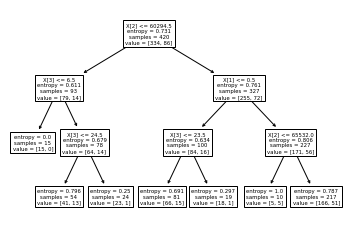

In [21]:
tree.plot_tree(model)

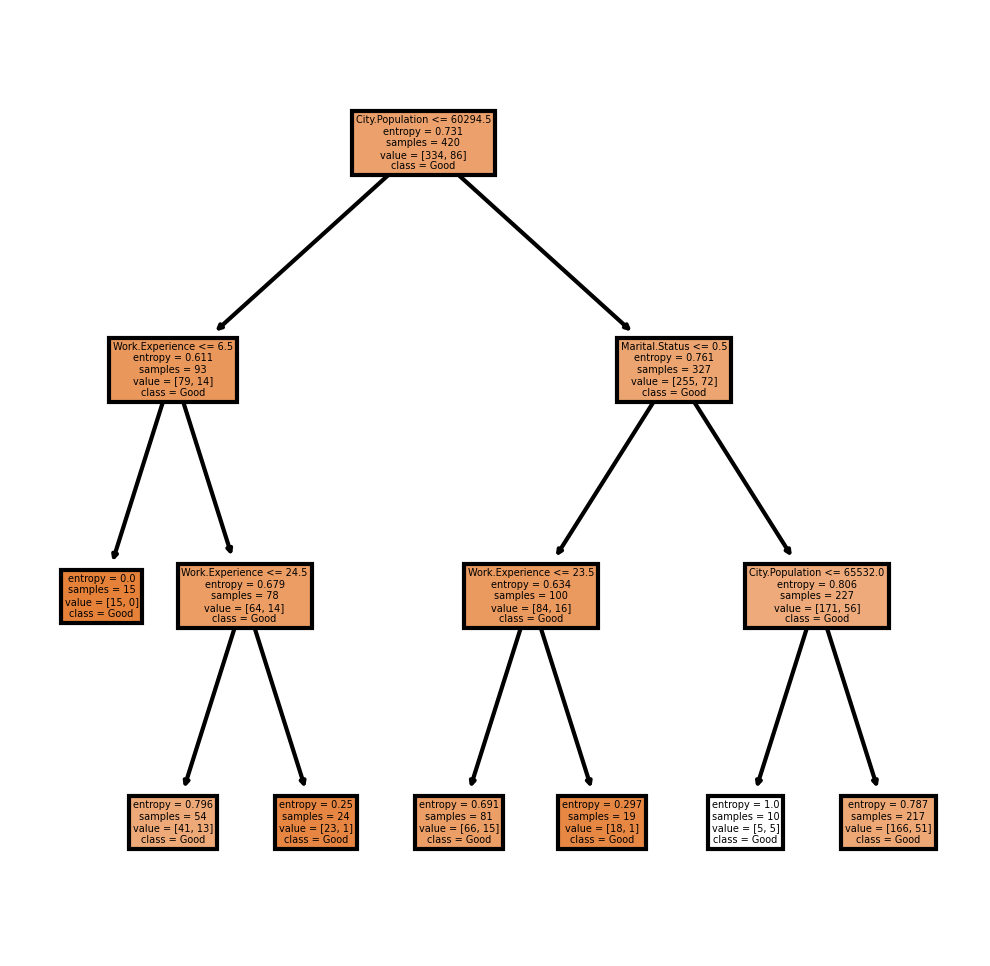

In [22]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Good', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_2 <= 60294.50
|   |--- feature_3 <= 6.50
|   |   |--- class: 0
|   |--- feature_3 >  6.50
|   |   |--- feature_3 <= 24.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  24.50
|   |   |   |--- class: 0
|--- feature_2 >  60294.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_3 <= 23.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  23.50
|   |   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 65532.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  65532.00
|   |   |   |--- class: 0



In [24]:
model.feature_importances_

array([0.        , 0.14486041, 0.24643119, 0.6087084 , 0.        ])

In [25]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Work.Experience    0.608708
City.Population    0.246431
Marital.Status     0.144860
Undergrad          0.000000
Urban              0.000000
dtype: float64

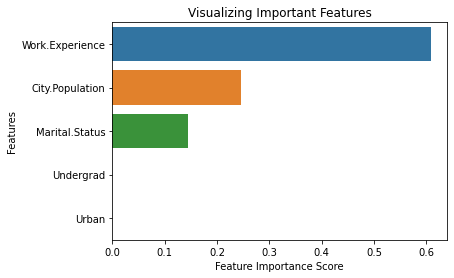

In [26]:
import seaborn as sns
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [27]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [28]:
pd.Series(pred).value_counts() 

0    180
dtype: int64

In [29]:
np.mean(pred==y_test)

0.7944444444444444

In [30]:
pd.crosstab(y_test,pred)

col_0,0
Taxable_Categorical,
0,143
1,37


 # Building Decision Tree Classifier (CART) using Gini Criteria

In [31]:
model_gini= DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model_gini.fit(x_train,y_train) 

DecisionTreeClassifier(max_depth=3)

In [32]:
model_gini.feature_importances_

array([0.13618173, 0.17120392, 0.69261436, 0.        , 0.        ])

In [33]:
pred_gini=model_gini.predict(x_test)
pred_gini

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [34]:
np.mean(y_test==pred_gini)

0.7888888888888889

In [35]:
pd.crosstab(y_test,pred_gini) 

col_0,0,1
Taxable_Categorical,,
0,142,1
1,37,0


[Text(0.5, 0.875, 'X[2] <= 60294.5\ngini = 0.326\nsamples = 420\nvalue = [334, 86]'),
 Text(0.25, 0.625, 'X[0] <= 0.5\ngini = 0.256\nsamples = 93\nvalue = [79, 14]'),
 Text(0.125, 0.375, 'X[1] <= 1.5\ngini = 0.153\nsamples = 48\nvalue = [44, 4]'),
 Text(0.0625, 0.125, 'gini = 0.213\nsamples = 33\nvalue = [29, 4]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.375, 0.375, 'X[2] <= 27659.0\ngini = 0.346\nsamples = 45\nvalue = [35, 10]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4375, 0.125, 'gini = 0.325\nsamples = 44\nvalue = [35, 9]'),
 Text(0.75, 0.625, 'X[2] <= 64532.5\ngini = 0.343\nsamples = 327\nvalue = [255, 72]'),
 Text(0.625, 0.375, 'X[2] <= 63885.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'X[1] <= 0.5\ngini = 0.335\nsamples = 319\nvalue = [251, 68]'),
 Text(0.8125

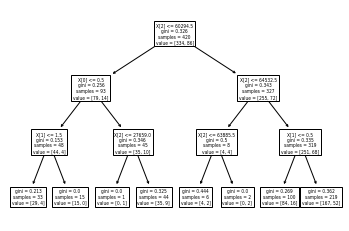

In [36]:
tree.plot_tree(model_gini) 

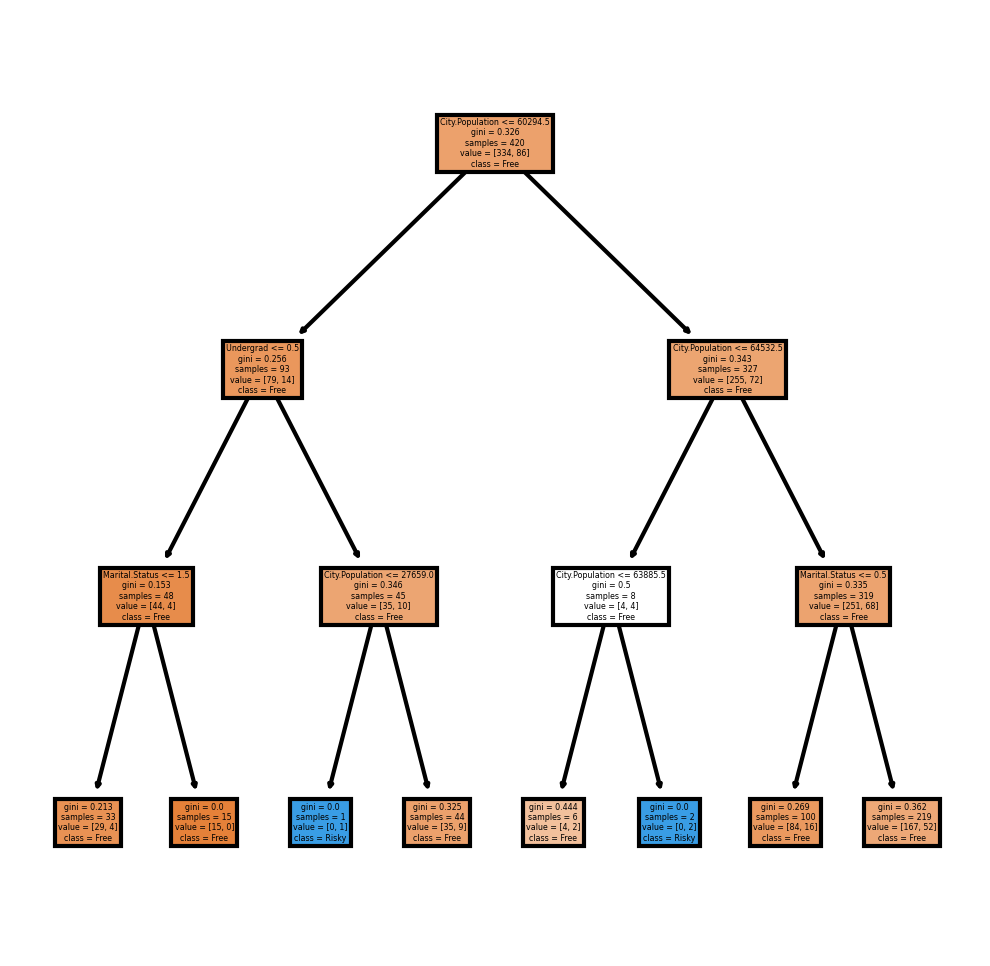

In [37]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Free','Risky' ]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [38]:
feature_imp_gini= pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp_gini

City.Population    0.692614
Marital.Status     0.171204
Undergrad          0.136182
Work.Experience    0.000000
Urban              0.000000
dtype: float64

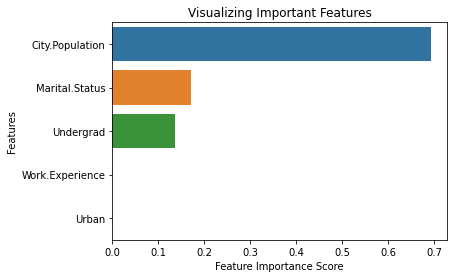

In [39]:
sns.barplot(x=feature_imp_gini, y=feature_imp_gini.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()